In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np

2023-04-01 00:00:33.755642: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-01 00:00:33.864700: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-01 00:00:35.660216: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/us

### Import and Preprocess the Data

In [1]:
routeImport = pd.read_json('./data/route_data.json')
for i in range(12, 15):
    routeImport = routeImport[routeImport.Grade != i]
routeImport = routeImport[routeImport.MoonBoardHoldSetup == 'MoonBoard Masters 2017']
sns.countplot(x='Grade', data=routeImport)
routeImport = routeImport[routeImport.RepeatText != 'Be the first to repeat this problem']
#routeImport = routeImport[routeImport.Grade != 11]

NameError: name 'pd' is not defined

In [65]:
#If re-running all cells, run this instead of re-importing the data, its faster
df = routeImport.copy()
print(df.groupby('Grade')['IsBenchmark'].value_counts())

Grade  IsBenchmark
2      False           733
       True             28
3      False          7159
       True             73
4      False          2868
       True             66
5      False          4581
       True             95
6      False          2391
       True             41
7      False          1594
       True             25
8      False          1386
       True             39
9      False           403
       True             35
10     False           158
       True             20
11     False            48
       True              5
Name: IsBenchmark, dtype: int64


<AxesSubplot:xlabel='Grade', ylabel='count'>

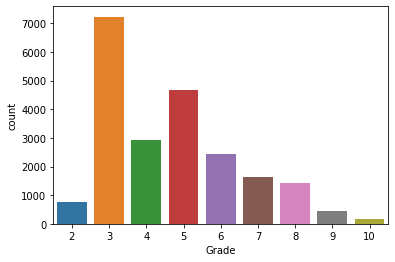

In [4]:
sns.countplot(x='Grade', data=df)

In [5]:
print(df.groupby('Grade')['IsBenchmark'].value_counts())

Grade  IsBenchmark
2      False           733
       True             28
3      False          7159
       True             73
4      False          2868
       True             66
5      False          4581
       True             95
6      False          2391
       True             41
7      False          1594
       True             25
8      False          1386
       True             39
9      False           403
       True             35
10     False           158
       True             20
Name: IsBenchmark, dtype: int64


In [6]:
def data_sampling(dataframe):
    over_bench_mult = 2.2;
    under_bench_mult = 1.5;

    smp2 = dataframe[dataframe.Grade == 2]
    smp3 = dataframe[dataframe.Grade == 3]
    smp4 = dataframe[dataframe.Grade == 4]
    smp5 = dataframe[dataframe.Grade == 5]
    smp6 = dataframe[dataframe.Grade == 6]
    smp7 = dataframe[dataframe.Grade == 7]
    smp8 = dataframe[dataframe.Grade == 8]
    smp9 = dataframe[dataframe.Grade == 9]
    smp10 = dataframe[dataframe.Grade == 10]

    under_3 = pd.concat([smp3[smp3.IsBenchmark != True].sample(frac=.73), 
                     smp3[smp3.IsBenchmark == True].sample(frac=under_bench_mult, replace=True)])
    under_5 = pd.concat([smp5[smp5.IsBenchmark != True].sample(frac=.77), 
                     smp5[smp5.IsBenchmark == True].sample(frac=under_bench_mult, replace=True)])

    over_2 = smp2.sample(frac=2, replace=True)
    over_4 = pd.concat([smp4.sample(frac=1.4, replace=True), 
                    smp4[smp4.IsBenchmark == True].sample(frac=over_bench_mult, replace=True)])
    over_6 = pd.concat([smp6.sample(frac=1.2, replace=True), 
                    smp6[smp6.IsBenchmark == True].sample(frac=over_bench_mult, replace=True)])
    over_7 = pd.concat([smp7.sample(frac=1.5, replace=True), 
                    smp7[smp7.IsBenchmark == True].sample(frac=over_bench_mult, replace=True)])
    over_8 = pd.concat([smp8.sample(frac=1.3, replace=True), 
                    smp8[smp8.IsBenchmark == True].sample(frac=over_bench_mult, replace=True)])
    over_9 = pd.concat([smp9.sample(frac=2.1, replace=True), 
                    smp9[smp9.IsBenchmark == True].sample(frac=over_bench_mult, replace=True)])
    over_10 = smp10.sample(frac=3.5, replace=True)

    return pd.concat([over_2, under_3, over_4, under_5, over_6, over_7, over_8, over_9, over_10])

def sample_train_df(X_train):
    return data_sampling(X_train)

def showcase_sampled_train_split(dataframe=routeImport.copy()):
    sns.countplot(x='Grade', data=data_sampling(dataframe.sample(frac=0.8)))

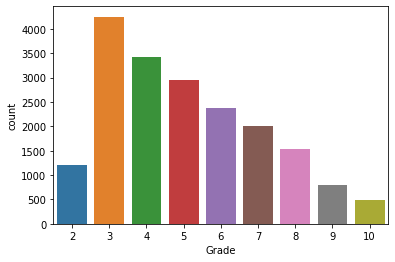

In [7]:
#display what the train set will look like
showcase_sampled_train_split(df)

<AxesSubplot:xlabel='Grade', ylabel='count'>

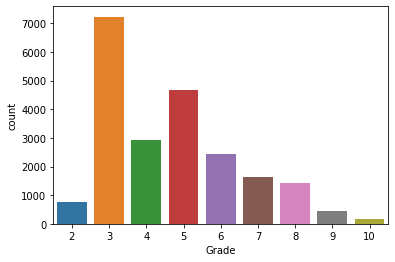

In [8]:
#the data has not been modified yet
sns.countplot(x='Grade', data=df)

In [9]:
#Undersample to n
#n = 5000
#mask = df.groupby('Grade')['Grade'].transform('count') >= n
#df = pd.concat((df[mask].groupby('Grade').sample(n=n), df[~mask]), ignore_index=True)

In [10]:
#Oversample to n
#n = 1000
#mask = df.groupby('Grade')['Grade'].transform('count') <= n
#df = pd.concat((df[mask].groupby('Grade').sample(frac=3.5, replace=True), df[~mask]), ignore_index=True)

#n = 2000
#mask = df.groupby('Grade')['Grade'].transform('count') <= n
#df = pd.concat((df[mask].groupby('Grade').sample(frac=2.0, replace=True), df[~mask]), ignore_index=True)

In [11]:
#chooseGrades = 3500
#mask = df.groupby('Grade')['Grade'].transform('count') <= chooseGrades
#df = df[df.RepeatText != 'Be the first to repeat this problem']
#for class_index, group in df.groupby('class'):
    #lst.append(group.sample(n-len(group), replace=True))
#frame_new = pd.concat(lst)
#new_df = pd.concat((df[mask], df)
#print(df.groupby('Grade')['IsBenchmark'].value_counts())
#sns.countplot(x='Grade', data=df.groupby('Grade')['IsBenchmark'])

In [12]:
print(data_sampling(df).groupby('Grade')['Grade'].value_counts())

Grade  Grade
2      2        1522
3      3        5336
4      4        4253
5      5        3669
6      6        3008
7      7        2483
8      8        1938
9      9         997
10     10        623
Name: Grade, dtype: int64


In [13]:
print(data_sampling(df).groupby('Grade')['IsBenchmark'].value_counts())

Grade  IsBenchmark
2      False          1463
       True             59
3      False          5226
       True            110
4      False          4015
       True            238
5      False          3527
       True            142
6      False          2871
       True            137
7      False          2390
       True             93
8      False          1797
       True            141
9      False           855
       True            142
10     False           561
       True             62
Name: IsBenchmark, dtype: int64


In [14]:
#print(df.groupby('Method')['Method'].value_counts())

In [15]:
df.head()

### Formatting Input

In [16]:
def get_x_y(hold: dict):
    x = ord(hold['Position'][0]) - 64
    y = int(hold['Position'][1:])
    return x, y

def get_closest_hold(current_hold: dict, valid_holds: list) -> dict:
    x1, y1 = get_x_y(current_hold)
    distances = list(map(lambda hold: ((x1 - get_x_y(hold)[0])**2 + (y1 - get_x_y(hold)[1])**2)**0.5, valid_holds))
    return valid_holds[np.argmin(distances)]

def get_next_hold(current_hold: dict, holds: list) -> dict:
    x, y = get_x_y(current_hold)
    min_y = 19
    for hold in holds:
        x2, y2 = get_x_y(hold)
        if y2 <= min_y and y2 >= y:
            min_y = y2
    valid_holds = [hold for hold in holds if get_x_y(hold)[1] == min_y]
    return get_closest_hold(current_hold, valid_holds)

In [17]:
def sort_hand_holds(moves: list, sorted_holds = []) -> list:
    holds = moves.copy()

    if len(sorted_holds) == 0:
        sorted_holds = [hold for hold in holds if hold['IsStart']]
        holds = [hold for hold in holds if hold['IsStart'] == False]

    if sorted_holds[-1]['IsEnd']:
        return list(map(lambda x: x['Position'], sorted_holds))
    
    next_hold = get_next_hold(sorted_holds[-1], holds)
    sorted_holds.append(next_hold)
    holds.remove(next_hold)

    return sort_hand_holds(holds, sorted_holds)

In [18]:
def format_input(route) -> list:
    climbing_methods = {
        'Feet follow hands': 'FFH',
        'Feet follow hands + screw ons': 'FFHSO',
        'Footless + kickboard': 'FLKB',
        'Screw ons only': 'SOO'
    }
    
    config = route.MoonboardConfiguration[:3]
    method = climbing_methods[route.Method]
    sorted_holds = sort_hand_holds(route.Moves)
    #repeatNum = route.RepeatText[:1]
    
    return [config, method] + sorted_holds

In [19]:
hold_to_idx = {
    '[PAD]': 0, 
    '[START]': 1, 
    '[END]': 2
}
vocab_size = len(hold_to_idx)

def tokenize_holds(holds):
    def hold_to_idx_emplace(hold):
        global vocab_size
        if hold not in hold_to_idx:
            hold_to_idx[hold] = vocab_size
            vocab_size += 1
        return hold_to_idx[hold]
    
    return list(map(hold_to_idx_emplace, holds))

In [20]:
def tokenize_df(dataframe, verbose=True):
    inputs = [format_input(route) for _, route in dataframe.iterrows()]
    tokenized_inputs = [tokenize_holds(x) for x in inputs]
    idx_to_hold = {v: k for k, v in hold_to_idx.items()}
    
    #Pad route inputs to be the same length
    max_len = 0
    for h in tokenized_inputs:
        max_len = max(max_len, len(h))
    max_len += 2 # PADDING for eventual START and END tokens during training

    for i in range(len(tokenized_inputs)):
        l = len(tokenized_inputs[i])
        tokenized_inputs[i] += [0]*(max_len-l)
    
    if(verbose):
        print("Tokenized input example:")
        print(tokenized_inputs[0])
        print([idx_to_hold[i] for i in tokenized_inputs[0]])
    
    return np.array(tokenized_inputs)

In [21]:
def tokenize_train_test_val_df(X_train, X_test, X_val):
    return tokenize_df(X_train), tokenize_df(X_test, verbose=False), tokenize_df(X_val, verbose=False)

In [22]:
#tokenized_inputs = [tokenize_holds(x) for x in inputs]

In [23]:
#idx_to_hold = {v: k for k, v in hold_to_idx.items()}

Pad route inputs to be the same length.

In [24]:
#max_len = 0
#for h in tokenized_inputs:
#    max_len = max(max_len, len(h))
#max_len += 2 # PADDING for eventual START and END tokens during training

#for i in range(len(tokenized_inputs)):
#    l = len(tokenized_inputs[i])
#    tokenized_inputs[i] += [0]*(max_len-l)

Tokenized input example:

In [25]:
#print(tokenized_inputs[0])

In [26]:
#print([idx_to_hold[i] for i in tokenized_inputs[0]])

### Train Test Split

In [27]:
#X = np.array(tokenized_inputs)
#y = df.Grade.to_numpy()-2

In [28]:
#def split_train_test():
    #X, y = create_X_y()
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
    #print("train, test: ", len(X_train), len(X_test))
    #return X_train, X_test, y_train, y_test

In [29]:
def split_train_test_val(sampling):
    X = df
    y = df.Grade.to_numpy()-2
    
    if(sampling):
        train_ratio = 0.8
        #validation_ratio = (1-train_ratio)/2 = 0.1
        #test_ratio = (1-train_ratio)/2 = 0.1
    else:
        train_ratio = 0.9 # ^2 = 0.81
        #validation_ratio = train_ratio * validation_split = 0.09
        #test_ratio = 1-train_ratio = 0.1
    
    # if sampling, train is 80% of the entire data set, test is now 20% of the dataset
    # if not sampling, train is 90%, test is 10%
    # X_train and X_test are DataFrames of routes, y_train and y_test are numpy arrays of grades
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1 - train_ratio), stratify=y)
    
    if(sampling):
        # test is now half the remaining dataset, or 10% of the initial data set
        # validation is now half the remaining dataset, or 10% of the initial data set
        # X_val and X_test are DataFrames of routes, y_val and y_test are numpy arrays of grades
        X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test) 
    else:
        X_val = pd.DataFrame(np.zeros(0))
        y_val = np.zeros(0)
    print("X train, test, val (base): ", len(X_train), len(X_test), len(X_val))
    print("y train, test, val (base): ", len(y_train), len(y_test), len(y_val))
    
    if(sampling):
        # over and undersample the train dataset
        X_train = sample_train_df(X_train)
    
        print("X train, test, val (sampled): ", len(X_train), len(X_test), len(X_val))
        print("y train, test, val (sampled): ", len(y_train), len(y_test), len(y_val))
    
        tr_y = X_train.Grade.to_numpy()-2
    
        X_train, t, y_train, t = train_test_split(X_train, tr_y, test_size=0.0005, stratify=tr_y)
    
        print("X train, test, val (resized): ", len(X_train), len(X_test), len(X_val))
        print("y train, test, val (resized): ", len(y_train), len(y_test), len(y_val))
    else:
        print("X train, test, val (current): ", len(X_train), len(X_test), len(X_val))
        print("y train, test, val (current): ", len(y_train), len(y_test), len(y_val))
        temp_trainX, temp_valX, temp_trainy, temp_valy = train_test_split(X_train, y_train, test_size=0.1)
        print("X train, test, val (runtime): ", len(temp_trainX), len(X_test), len(temp_valX))
        print("y train, test, val (runtime): ", len(temp_trainy), len(y_test), len(temp_valy))
    
    return X_train, X_test, X_val, y_train, y_test, y_val

In [30]:
# test
#X_train, X_test, X_val, y_train, y_test, y_val = split_train_test_val(False)

### Model Definition

In [31]:
def positional_encoding(length, depth):
    depth = depth/2

    positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
    depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

    angle_rates = 1 / (10000**depths)         # (1, depth)
    angle_rads = positions * angle_rates      # (pos, depth)

    pos_encoding = np.concatenate(
      [np.sin(angle_rads), np.cos(angle_rads)],
      axis=-1) 

    return tf.cast(pos_encoding, dtype=tf.float32)

In [32]:
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, vocab_size, d_model):
        super().__init__()
        self.d_model = d_model
        self.embedding = tf.keras.layers.Embedding(vocab_size, d_model, mask_zero=True) 
        self.pos_encoding = positional_encoding(length=2048, depth=d_model)

    def compute_mask(self, *args, **kwargs):
        return self.embedding.compute_mask(*args, **kwargs)

    def call(self, x):
        length = tf.shape(x)[1]
        x = self.embedding(x)
        # This factor sets the relative scale of the embedding and positonal_encoding.
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x = x + self.pos_encoding[tf.newaxis, :length, :]
        return x

In [33]:
embed_holds = PositionalEmbedding(vocab_size=vocab_size, d_model=512)
X = np.array(tokenize_df(df))
emb = embed_holds(X[:100])

2023-03-07 18:51:31.813815: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 18:51:33.099774: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13635 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:60:00.0, compute capability: 7.5
2023-03-07 18:51:33.101658: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13635 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:61:00.0, compute capability: 7.5


Tokenized input example:
[3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['40°', 'FFH', 'D4', 'H5', 'F8', 'F12', 'C14', 'F17', 'F18', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [34]:
class BaseAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
        self.layernorm = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()

class GlobalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x)
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x

In [35]:
sample_gsa = GlobalSelfAttention(num_heads=2, key_dim=512)

print(emb.shape)
print(sample_gsa(emb).shape)

(100, 20, 512)
(100, 20, 512)


2023-03-07 18:51:41.831269: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401


In [36]:
class FeedForward(tf.keras.layers.Layer):
    def __init__(self, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.seq = tf.keras.Sequential([
          tf.keras.layers.Dense(dff, activation='relu'),
          tf.keras.layers.Dense(d_model),
          tf.keras.layers.Dropout(dropout_rate)
        ])
        self.add = tf.keras.layers.Add()
        self.layer_norm = tf.keras.layers.LayerNormalization()

    def call(self, x):
        x = self.add([x, self.seq(x)])
        x = self.layer_norm(x) 
        return x

In [37]:
sample_ffn = FeedForward(512, 2048)

print(emb.shape)
print(sample_ffn(emb).shape)

(100, 20, 512)
(100, 20, 512)


In [38]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self,*, d_model, num_heads, dff, dropout_rate=0.1):
        super().__init__()

        self.self_attention = GlobalSelfAttention(
            num_heads=num_heads,
            key_dim=d_model,
            dropout=dropout_rate)

        self.ffn = FeedForward(d_model, dff)

    def call(self, x):
        x = self.self_attention(x)
        x = self.ffn(x)
        return x

In [39]:
sample_encoder_layer = EncoderLayer(d_model=512, num_heads=8, dff=2048)

print(emb.shape)
print(sample_encoder_layer(emb).shape)

(100, 20, 512)
(100, 20, 512)


In [40]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, *, num_layers, d_model, num_heads,
               dff, vocab_size, dropout_rate=0.1):
        super().__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.pos_embedding = PositionalEmbedding(
            vocab_size=vocab_size, d_model=d_model)

        self.enc_layers = [
            EncoderLayer(d_model=d_model,
                         num_heads=num_heads,
                         dff=dff,
                         dropout_rate=dropout_rate)
            for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x):
        # `x` is token-IDs shape: (batch, seq_len)
        x = self.pos_embedding(x)  # Shape `(batch_size, seq_len, d_model)`.

        # Add dropout.
        x = self.dropout(x)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x)

        return x  # Shape `(batch_size, seq_len, d_model)`.

In [41]:
# Instantiate the encoder.
sample_encoder = Encoder(num_layers=4,
                         d_model=512,
                         num_heads=8,
                         dff=2048,
                         vocab_size=vocab_size)

sample_encoder_output = sample_encoder(X[:100], training=False)

# Print the shape.
print(X[:100].shape)
print(sample_encoder_output.shape)  # Shape `(batch_size, input_seq_len, d_model)`.

(100, 20)
(100, 20, 512)


In [42]:
class EncoderClassifier(tf.keras.Model):
    def __init__(self, *, num_layers, d_model, num_heads, dff, vocab_size, num_classes, dropout_rate=0.1):
        super().__init__()
        self.encoder = Encoder(num_layers=num_layers, d_model=d_model, num_heads=num_heads, dff=dff, \
                               vocab_size=vocab_size, dropout_rate=dropout_rate)
        self.seq = tf.keras.Sequential([
          tf.keras.layers.Dense(256, activation='relu'),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(dropout_rate)
        ])
        self.final_layer = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, x):
        x = self.encoder(x)
        x = self.seq(x)
        logits = self.final_layer(x[:, 0, :])

        try:
            del logits._keras_mask
        except AttributeError:
            pass

        return logits

In [44]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super().__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, dtype=tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        result = tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
        return result
    
    def get_config(self):
        return {
            "d_model": self.d_model,
            "warmup_steps": self.warmup_steps,
        }
    
    def from_config(cls, config):
         return cls(**config)

In [45]:
#Doesn't work, don't run
class MultiGPU(tf.keras.optimizers.schedules.LearningRateSchedule):    
    def __init__(self, d_model, step_stages, step_mult, epochs_step):
        super().__init__()
        
        init_lr = np.array([
            #1-20: good, slightly high
            step_stages[0] * (4000 ** -1.5),
            #20-75: low
            step_stages[1] * (4000 ** -1.5),
            #75-120: good
            step_stages[2] * step_mult ** tf.math.floor(step_stages[2] / epochs_step),
            #120-200: low
            step_stages[3] * 0.08 * (4000 ** -1.5)])

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.step_stages = step_stages
        self.step_mult = step_mult
        self.epochs_step = epochs_step
        self.init_lr = init_lr
        

    def __call__(self, step):
        step = tf.cast(step, dtype=tf.float32)
        #print(step)
        #print(step.numpy)
        #print(np.array(step))
        step_stages = self.step_stages
        step_mult = self.step_mult
        epochs_step = self.epochs_step
        init_lr = self.init_lr
        
        #0-20: good, slightly high
        if np.array(step) < step_stages[1]:
            arg = step * (4000 ** -1.5)
        #20-75: low
        elif np.array(step) < step_stages[2]:
            initial = tf.cast(init_lr[1], dtype=tf.float32)
            arg = initial * step_mult[0] ** tf.math.floor(step / epochs_step)
        #75-120: good
        elif np.array(step) < step_stages[3]:
            arg = step * (4000 ** -1.5)
        #120+: low
        elif np.array(step) < step_stages[4]:
            initial =  tf.cast(init_lr[3], dtype=tf.float32)
            arg = initial * step_mult[1] ** tf.math.floor(step / epochs_step)
                    
        #arg1 = tf.math.rsqrt(step)
        #arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.cast(arg, tf.float32)
    
    def get_config(self):
        return {
            "d_model" : self.d_model,
            "step_stages" : self.step_stages,
            "step_mult" : self.step_mult,
            "epochs_step" : self.epochs_step,
            "init_lr" : self.init_lr,
        }
    
    def from_config(cls, config):
         return cls(**config)

### Model Training

In [95]:
num_layers = 4
d_model = 128
dff = 2048
num_heads = 8
dropout_rate = 0.4
epochs = 50
num_classes = df.Grade.nunique()
global_batch = 256

In [48]:
multi_gpu = False #If true, distrubutes over all GPUS allocated. If false, runs on 1 gpu
sampling = True #If true, the train dataset will be over/under sampled. If false -> model.fit(validation_split = 0.1)
global_batch = 64

In [49]:
#split up training sets
X_train, X_test, X_val, y_train, y_test, y_val = split_train_test_val(sampling)

# train, test, and val are now tokenized
print("\n")
X_train, X_test, X_val = tokenize_train_test_val_df(X_train, X_test, X_val)
print("\n")
print("X train, test, val (shape): ", np.shape(X_train), np.shape(X_test), np.shape(X_val))
print("y train, test, val (shape): ", np.shape(y_train), np.shape(y_test), np.shape(y_val))

if(sampling or multi_gpu):
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(global_batch)
    if(multi_gpu and not sampling):
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(global_batch)

X train, test, val (base):  17356 2170 2169
y train, test, val (base):  17356 2170 2169
X train, test, val (sampled):  19076 2170 2169
y train, test, val (sampled):  17356 2170 2169
X train, test, val (resized):  19066 2170 2169
y train, test, val (resized):  19066 2170 2169


Tokenized input example:
[3, 4, 19, 59, 129, 63, 39, 115, 73, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['40°', 'FFH', 'F4', 'E8', 'I10', 'G11', 'H14', 'E15', 'H18', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


X train, test, val (shape):  (19066, 20) (2170, 18) (2169, 18)
y train, test, val (shape):  (19066,) (2170,) (2169,)


In [52]:
def get_compiled_model():    
    #if(multi_gpu):
        #learning_rate = MultiGPU(d_model, 
                         #step_stages=np.array([1, 20, 75, 120, 200]), 
                         #step_mult=np.array([1.3, 1.2]), 
                         #epochs_step=10.0)
    #else:
    learning_rate = CustomSchedule(d_model)
        
    optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)
    
    model = EncoderClassifier(
        num_layers=num_layers,
        d_model=d_model,
        num_heads=num_heads,
        dff=dff,
        vocab_size=vocab_size,
        num_classes=num_classes,
        dropout_rate=dropout_rate
    )
    
    model.compile(
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            optimizer=optimizer,
            metrics=['accuracy'])
    
    return model

In [53]:
def define_workers(strategy):
    replicas = strategy.num_replicas_in_sync
    replica_batch = global_batch/replicas
    return replicas, replica_batch

In [54]:
def distribute_dataset(strategy):
    #train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(global_batch)
    #val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(global_batch)
    #train_dataset = train_dataset.batch(global_batch)
    #val_dataset = val_dataset.batch(global_batch)

    train_dist = strategy.experimental_distribute_dataset(train_dataset)
    val_dist = strategy.experimental_distribute_dataset(val_dataset)
    return train_dist, val_dist

In [101]:
if(multi_gpu):
    #Create a MirroredStrategy.
    strategy = tf.distribute.MirroredStrategy()
    print("Number of devices: {}".format(strategy.num_replicas_in_sync))

    #Open a strategy scope.
    with strategy.scope():
        #Everything that creates variables should be under the strategy scope.
        #In general this is only model construction & `compile()`.
        model = get_compiled_model()

    replicas, replica_batch = define_workers(strategy)
    train_dist, val_dist = distribute_dataset(strategy)
else:
    model = get_compiled_model()

In [102]:
if(multi_gpu):
    #Havings issues, something are not correct, doesn't return correct data. Evalutes in very little time though
    history = model.fit(train_dist, batch_size=replica_batch, epochs=epochs, 
                        validation_data=val_dist, steps_per_epoch=replicas*25, validation_steps=replicas*25, verbose=1)
elif(sampling):
    history = model.fit(train_dataset, batch_size=global_batch, epochs=epochs, validation_data=val_dataset, verbose=1)
else:
    history = model.fit(X_train, batch_size=global_batch, epochs=epochs, validation_split=0.1, verbose=1)

Epoch 1/50
75/75 [==============================] - 18s 105ms/step - loss: 2.2245 - accuracy: 0.1660 - val_loss: 1.8465 - val_accuracy: 0.3333
Epoch 2/50
75/75 [==============================] - 6s 76ms/step - loss: 2.0223 - accuracy: 0.2094 - val_loss: 1.8550 - val_accuracy: 0.3195
Epoch 3/50
75/75 [==============================] - 6s 77ms/step - loss: 1.8673 - accuracy: 0.2746 - val_loss: 1.4663 - val_accuracy: 0.4071
Epoch 4/50
75/75 [==============================] - 6s 77ms/step - loss: 1.5932 - accuracy: 0.3568 - val_loss: 1.3411 - val_accuracy: 0.4463
Epoch 5/50
75/75 [==============================] - 6s 78ms/step - loss: 1.5134 - accuracy: 0.3817 - val_loss: 1.3139 - val_accuracy: 0.4610
Epoch 6/50
75/75 [==============================] - 6s 78ms/step - loss: 1.4648 - accuracy: 0.3955 - val_loss: 1.2951 - val_accuracy: 0.4504
Epoch 7/50
75/75 [==============================] - 6s 78ms/step - loss: 1.4470 - accuracy: 0.3945 - val_loss: 1.2893 - val_accuracy: 0.4421
Epoch 8/50


In [ ]:
#model.save("1gpu_batch64_epoch150_dmodel164_drop25")

In [ ]:
#model = tf.saved_model.load("1gpu_batch48_epoch300_dmodel64_drop25")

# Keras Tuner

In [58]:
import keras_tuner
# Variables:

#constant
num_classes = df.Grade.nunique()
epochs = 30
global_batch = 64
# not used in this iteration:

# modular
# num_layers   =  2    -  12,   step 2   ->  6  options
# d_model      =  64   -  1024, step 64  ->  15 options
# dff          =  256  -  2048, step 256 ->  7  options
# num_heads    =  2    -  12,   step 2   ->  6  options
# dropout_rate =  0.1  -  0.5,  step 0.1 ->  5  options
# warmup_steps =  2000 -  6000, step 500 ->  9  options
# global_batch =  16   -  128,  step 16  ->  7  options


# learning_rate = CustomSchedule(d_model, warmup_steps=warmup_steps)
# ptimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

In [60]:
def build_model(hp):
    num_layers = hp.Int("num_layers", min_value=2, max_value=12, step=2)
    d_model = hp.Int("d_model", min_value=64, max_value=1024, step=64)
    dff = hp.Int("dff", min_value=256, max_value=2048, step=256)
    num_heads = hp.Int("num_heads", min_value=2, max_value=12, step=2)
    dropout_rate = hp.Float("dropout_rate", min_value=0.1, max_value=0.5, step=0.1)
    warmup_steps = hp.Int("warmup_steps", min_value=2000, max_value=6000, step=250)
    global_batch = hp.Int("global_batch", min_value=16, max_value=128, step=16)
    
    num_classes = df.Grade.nunique()
    
    learning_rate = CustomSchedule(d_model, warmup_steps=warmup_steps)
    optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)
    
    model = EncoderClassifier(
        num_layers=num_layers,
        d_model=d_model,
        num_heads=num_heads,
        dff=dff,
        vocab_size=vocab_size,
        num_classes=num_classes,
        dropout_rate=dropout_rate
    )
    
    model.compile(
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            optimizer=optimizer,
            metrics=['accuracy'])
    
    return model

In [61]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10)

In [62]:
tuner.search(X_train, epochs=10, validation_data=val_dataset)
best_model = tuner.get_best_models()[0]

Trial 2 Complete [00h 00m 02s]

Best val_loss So Far: None
Total elapsed time: 00h 00m 04s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
8                 |?                 |num_layers
576               |?                 |d_model
512               |?                 |dff
6                 |?                 |num_heads
0.1               |?                 |dropout_rate
5000              |?                 |warmup_steps
64                |?                 |global_batch

Epoch 1/10


Traceback (most recent call last):
  File "/home/milleraa/.local/lib/python3.8/site-packages/keras_tuner/engine/base_tuner.py", line 266, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/home/milleraa/.local/lib/python3.8/site-packages/keras_tuner/engine/base_tuner.py", line 231, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/home/milleraa/.local/lib/python3.8/site-packages/keras_tuner/engine/tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/home/milleraa/.local/lib/python3.8/site-packages/keras_tuner/engine/tuner.py", line 214, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/home/milleraa/.local/lib/python3.8/site-packages/keras_tuner/engine/hypermodel.py", line 144, in fit
    return model.fit(*args, **kwargs)
  File "/home/milleraa/.local/lib/python3.8/site-packages/keras/u

RuntimeError: Number of consecutive failures excceeded the limit of 3.
Traceback (most recent call last):
  File "/home/milleraa/.local/lib/python3.8/site-packages/keras_tuner/engine/base_tuner.py", line 266, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/home/milleraa/.local/lib/python3.8/site-packages/keras_tuner/engine/base_tuner.py", line 231, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/home/milleraa/.local/lib/python3.8/site-packages/keras_tuner/engine/tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/home/milleraa/.local/lib/python3.8/site-packages/keras_tuner/engine/tuner.py", line 214, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/home/milleraa/.local/lib/python3.8/site-packages/keras_tuner/engine/hypermodel.py", line 144, in fit
    return model.fit(*args, **kwargs)
  File "/home/milleraa/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_filev71w8peq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/home/milleraa/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/milleraa/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/milleraa/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/milleraa/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1025, in train_step
        self._validate_target_and_loss(y, loss)
    File "/home/milleraa/.local/lib/python3.8/site-packages/keras/engine/training.py", line 979, in _validate_target_and_loss
        raise ValueError(

    ValueError: Target data is missing. Your model was compiled with loss=<keras.losses.SparseCategoricalCrossentropy object at 0x7fae19a50430>, and therefore expects target data to be provided in `fit()`.



### Training Plots

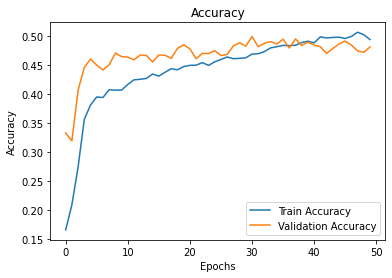

In [103]:
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

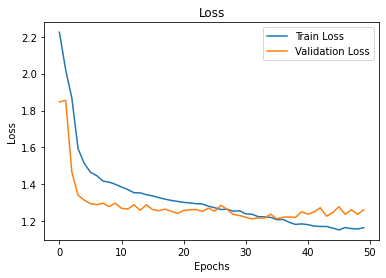

In [104]:
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.axis([75, 200, 1.2, 2.2])
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

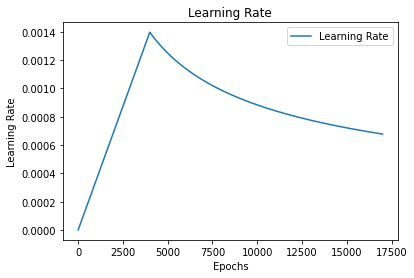

In [105]:
#learning_rate = MultiGPU(d_model, 
                         #step_stages=np.array([1, 20, 75, 120, 200]), 
                         #step_mult=np.array([1.3, 1.2]), 
                         #epochs_step=10.0)
learning_rate = CustomSchedule(d_model)
lr = np.array([])
for i in range(1, 17000):
    lr = np.append(lr, learning_rate.__call__(i))
    #print(learning_rate.__call__(i).numpy())
plt.title('Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.plot(lr, label='Learning Rate')
#plt.axis([0, 300, 0, 0.000125])
plt.legend()


### Model Evaluation

In [106]:
pred = model.predict(X_test)

68/68 [==============================] - 1s 11ms/step


In [107]:
def norm_cm(cm):
    return np.array([cm[i] / np.sum(cm[i]) for i in range(len(cm))])
    
def accuracy(cm):
    return cm.diagonal().sum() / cm.sum()
def top_1_accuracy(cm):
    return (cm.diagonal(-1).sum() + cm.diagonal(0).sum() + cm.diagonal(1).sum()) / cm.sum()
def top_2_accuracy(cm):
    return (cm.diagonal(-2).sum() + cm.diagonal(-1).sum() + cm.diagonal(0).sum() + cm.diagonal(1).sum() +
                 cm.diagonal(2).sum()) / cm.sum()

In [108]:
cm = confusion_matrix(y_test, np.argmax(pred, axis=1))
normalized_cm = norm_cm(cm)
print('accuracy', accuracy(cm))
print('+-1 accuracy', top_1_accuracy(cm))
print('+-2 accuracy', top_2_accuracy(cm))

accuracy 0.4705069124423963
+-1 accuracy 0.8682027649769585
+-2 accuracy 0.9695852534562212


Heatmap

<AxesSubplot:>

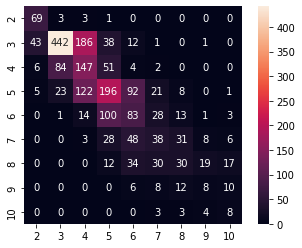

In [109]:
sns.heatmap(cm, xticklabels=range(2, 11), yticklabels=range(2, 11), annot=True, fmt='g', square=True)

Normalized Heatmap

<AxesSubplot:>

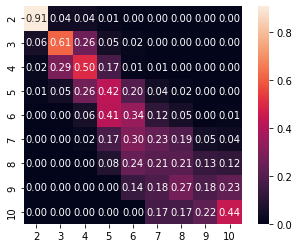

In [110]:
sns.heatmap(normalized_cm, xticklabels=range(2, 11), yticklabels=range(2, 11), annot=True, fmt='.2f', square=True)

In [70]:
GCNcm = np.array([
    [263, 58, 32, 7, 5, 3, 1, 2, 2, 0, 0],
    [175, 98, 64, 19, 22, 20, 4, 3, 6, 0, 4],
    [66, 132, 79, 25, 31, 29, 3, 16, 11, 0, 3],
    [29, 78, 62, 37, 53, 51, 36, 23, 6, 3, 13],
    [29, 55, 43, 24, 35, 62, 33, 63, 9, 2, 23],
    [10, 38, 46, 26, 62, 41, 73, 99, 11, 0, 12],
    [0, 25, 19, 19, 10, 34, 112, 158, 14, 6, 11],
    [45, 0, 63, 0, 27, 82, 0, 89, 59, 0, 0],
    [0, 0, 0, 0, 0, 0, 242, 87, 183, 86, 0],
    [0, 0, 0, 0, 0, 0, 141, 0, 133, 0, 126],
    [142, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])
#normalized_GCNcm = norm_cm(GCNcm)
print('accuracy', accuracy(GCNcm))
#print('accuracy', accuracy(normalized_GCNcm))
print('+-1 accuracy', top_1_accuracy(GCNcm))
#print('+-1 accuracy', top_1_accuracy(normalized_GCNcm))
print('+-2 accuracy', top_2_accuracy(GCNcm))
#print('+-2 accuracy', top_2_accuracy(normalized_GCNcm))

accuracy 0.21877188886294655
+-1 accuracy 0.5626897034788699
+-2 accuracy 0.7555451786131216
